# League Of Legends Data Set
### Predict winner with machine learning

# Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/lopez-isaac/project-data-sets/master/world%202018%20lol.csv"
main_df = pd.read_csv(url)

In [3]:
main_df.tail()

,gameid,url,league,split,date,week,game,patchno,playerid,side,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
1423,1002520052,https://matchhistory.na.leagueoflegends.com/en...,WC,2018-W,43407.19059,F,3,8.19,8,Red,...,355,4340,4159,181,72,76,-4,104,112,-8
1424,1002520052,https://matchhistory.na.leagueoflegends.com/en...,WC,2018-W,43407.19059,F,3,8.19,9,Red,...,-1471,3516,3328,188,86,84,2,142,139,3
1425,1002520052,https://matchhistory.na.leagueoflegends.com/en...,WC,2018-W,43407.19059,F,3,8.19,10,Red,...,-252,2366,2246,120,0,5,-5,1,10,-9
1426,1002520052,https://matchhistory.na.leagueoflegends.com/en...,WC,2018-W,43407.19059,F,3,8.19,100,Blue,...,1842,17371,18733,-1362,290,291,-1,463,446,17
1427,1002520052,https://matchhistory.na.leagueoflegends.com/en...,WC,2018-W,43407.19059,F,3,8.19,200,Red,...,-1842,18733,17371,1362,291,290,1,446,463,-17


# Data Wrangling

In [4]:
#remove display limits

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#copy data
clean_up = main_df

### Droping columns

In [5]:
#First glance drop timebased or Unnecessary columns
drop = ["gameid","url","league","split","date","week","game","patchno","playerid","player","team",]

clean_up = main_df.drop(columns=drop)

#drop to many blanks (NAN equivalent)
clean_up = clean_up.drop(columns=["visiblewardclearrate","invisiblewardclearrate"])

#post machine learning features casing leakage
clean_up = clean_up.drop(columns=["opptowerkills","teamtowerkills"])

### Cleaning NaN vaues

In [6]:
#check for null values
clean_up.isnull().sum()

side                          0
position                      0
champion                      0
ban1                          0
ban2                          0
ban3                          0
ban4                          0
ban5                          0
gamelength                    0
result                        0
k                             0
d                             0
a                             0
teamkills                     0
teamdeaths                    0
doubles                       0
triples                       0
quadras                       0
pentas                        0
fb                            0
fbassist                      0
fbvictim                      0
fbtime                        0
kpm                           0
okpm                          0
ckpm                          0
fd                            0
fdtime                        0
teamdragkills                 0
oppdragkills                  0
elementals                    0
oppeleme

In [7]:
## Fix nan values

#fill nan values with either 1 or 0 
fill_list =[1,0]
clean_up['fbaron'] = clean_up['fbaron'].fillna(pd.Series(np.random.choice(fill_list, size=len(clean_up.index))))

#fill nan values with the column mean
clean_up["fbarontime"]  = clean_up["fbarontime"].fillna((clean_up["fbarontime"].mean()))

#fill nan values with either 1 or 0 
clean_up["herald"] = clean_up["herald"].fillna(pd.Series(np.random.choice(fill_list,size=len(clean_up.index))))

#drop the column mostly nan values
clean_up = clean_up.drop(columns=["heraldtime"])

In [8]:
#check to make sure numbers are numbers types
clean_up.dtypes

side                        object
position                    object
champion                    object
ban1                        object
ban2                        object
ban3                        object
ban4                        object
ban5                        object
gamelength                 float64
result                       int64
k                            int64
d                            int64
a                            int64
teamkills                    int64
teamdeaths                   int64
doubles                     object
triples                     object
quadras                     object
pentas                      object
fb                           int64
fbassist                     int64
fbvictim                     int64
fbtime                     float64
kpm                        float64
okpm                       float64
ckpm                       float64
fd                           int64
fdtime                     float64
teamdragkills       

In [9]:
#change data type object to flaots using mode

object_float = ["doubles","triples","quadras","pentas"]

for x in object_float:
    clean_up[x] = clean_up[x].replace(' ', np.NaN)
    #fill nan values with the column mode
    clean_up[x]  = clean_up[x].fillna(clean_up[x].mode()[0])
    clean_up[x] = clean_up[x].astype(float)

In [10]:
#chnage data type object to float using mean

object_float2 = ["dmgshare","earnedgoldshare"]

for x in object_float2:
    clean_up[x] = clean_up[x].replace(' ', np.NaN)
    clean_up[x] = clean_up[x].astype(float)
    clean_up[x]  = clean_up[x].fillna((clean_up[x].mean()))

### Renaming important features

In [11]:
#post model cleaning important abriviated featues

rename = {"fdtime":"first dragon time",
          "fbtime":"first blood time",
          "ckpm":"combined kills per min",
          "fttime":"first tower time","fbarontime":"first baron time"}

clean_up = clean_up.rename(columns=rename)

# Feature Engineering

In [12]:
# copy data 
feat_engin = clean_up
print(clean_up.shape)
clean_up.head()

(1428, 82)


,side,position,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,first blood time,kpm,okpm,combined kills per min,fd,first dragon time,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,ft,first tower time,firstmidouter,firsttothreetowers,fbaron,first baron time,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,Blue,Top,Aatrox,Vel'koz,Shen,Akali,Irelia,Braum,30.183333,1,3,1,5,13,6,0.0,0.0,0.0,0.0,0,0,0,11.763633,0.099393,0.033131,0.629486,0,10.689683,1,2,0,0,0,0,0,0,0,0,1.0,1,11.443183,1,1,1.0,26.673033,1,0,11334,375.505246,0.218676,0.252572,13,0.430701,0.138298,7,0.231916,4,5,14404,345.686140,11725,0.178862,274,40,13,12,10.403092,3463,3044,419,6066,4483,1583,5060,4438,622,97,76,21,156,117,39
1,Blue,Jungle,Xin Zhao,Vel'koz,Shen,Akali,Irelia,Braum,30.183333,1,4,2,4,13,6,1.0,0.0,0.0,0.0,0,0,0,11.763633,0.132523,0.066262,0.629486,0,10.689683,1,2,1,2,1,0,0,0,0,0,1.0,1,11.443183,1,1,1.0,26.673033,1,0,7941,263.092214,0.153212,0.195832,9,0.298178,0.095745,12,0.397570,7,7,12060,268.027388,10608,0.209080,23,158,95,16,5.996687,3034,2968,66,4702,4366,336,3453,3356,97,61,51,10,90,82,8
2,Blue,Middle,Ryze,Vel'koz,Shen,Akali,Irelia,Braum,30.183333,1,2,1,5,13,6,0.0,0.0,0.0,0.0,0,0,0,11.763633,0.066262,0.033131,0.629486,0,10.689683,1,2,0,0,0,0,0,0,0,0,1.0,1,11.443183,1,1,1.0,26.673033,1,0,11482,380.408614,0.221532,0.219554,14,0.463832,0.148936,6,0.198785,8,10,13040,300.495638,11950,0.218097,287,23,16,5,10.270569,3444,3314,130,5650,5204,446,4949,4971,-22,95,92,3,161,156,5
3,Blue,ADC,Kai'Sa,Vel'koz,Shen,Akali,Irelia,Braum,30.183333,1,4,0,6,13,6,0.0,0.0,0.0,0.0,1,0,0,11.763633,0.132523,0.033131,0.629486,0,10.689683,1,2,0,0,0,0,0,0,0,0,1.0,1,11.443183,1,1,1.0,26.673033,1,0,17262,571.905025,0.333050,0.231803,12,0.397570,0.127660,10,0.331309,3,4,13546,317.259856,11150,-0.026549,288,8,4,0,9.806737,3161,3151,10,5483,5082,401,3082,3402,-320,82,84,-2,138,146,-8
4,Blue,Support,Leona,Vel'koz,Shen,Akali,Irelia,Braum,30.183333,1,0,2,10,13,6,0.0,0.0,0.0,0.0,0,1,0,11.763633,0.000000,0.033131,0.629486,0,10.689683,1,2,0,0,0,0,0,0,0,0,1.0,1,11.443183,1,1,1.0,26.673033,1,0,3811,126.261734,0.073529,0.100239,46,1.524020,0.489362,5,0.165654,19,19,8111,137.193595,7425,0.175824,60,0,0,0,1.987852,2065,2018,47,3389,3083,306,2902,2607,295,17,3,14,29,8,21


In [13]:
#Make a new feature of blue side being played 
feat_engin["blue_side"] = (feat_engin["side"] == "Blue")

#convert true and false to numerical 
blue_side = {True:1,False:0}
feat_engin["blue_side"] = feat_engin["blue_side"].replace(blue_side)

### New Target

Using resuts as our target would cause the models used to overfit. We were asking did team a win or lose. There were to many features that would leak data into predicting that. By making a new target more specfic of what side won the match blue or red. It forced the model to get more specific so to speak. before it was if team has more towers team wins now its who took the first tower and the number of towers taken in the game no longer causes data leakage.   

In [14]:
#Engineering new target blue win or red win
#old target did team win or lose match

#make column to string
match_result = feat_engin["result"].tolist()
side_played = feat_engin["blue_side"].tolist()

#evaluate list
blue_victory =[]
for x,y in zip(side_played,match_result):
    blue_victory.append(x ==y)

#add results to dataframe    
feat_engin["bluevictory"] = blue_victory

#Convert boolean answers to numberical
feat_engin["bluevictory"] = feat_engin["bluevictory"].replace(blue_side)

# Machine learning

## Baseline
Since we are predicting a classification problem we need to see 
all the possible outcomes and how oftan each occurs to take a blind guess. 
In our case blue side won 57% of the time. We have a slight chance of guessing the correct winning side  

In [15]:
#Copy data
Tournament = feat_engin

In [16]:
#Baseline
target = Tournament["bluevictory"]
Tournament["bluevictory"].value_counts(normalize=True)

1    0.571429
0    0.428571
Name: bluevictory, dtype: float64

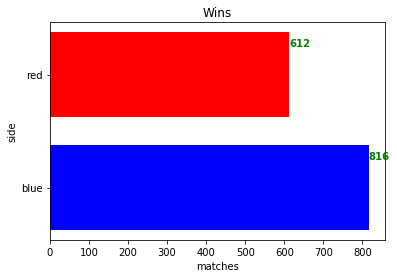

In [17]:
#Baseline visual
a = Tournament["bluevictory"].value_counts()

x = list(a.index)
y = list(a)

fig, ax = plt.subplots()
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
colors = ['b','r']
ax.barh(ind, y, width, color=colors)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.yticks([0,1], ['blue', 'red'])
for i, v in enumerate(y):
    ax.text(v + .20, i + .25, str(v), color='green', fontweight='bold') #add value labels into bar
plt.title('Wins')
plt.xlabel('matches')
plt.ylabel('side')
plt.show()

## Train, Validation, Test Split

In [18]:
#import needed libraies
from sklearn.model_selection import train_test_split

In [19]:
#train and test split 85% and 15% split
train, test = train_test_split(Tournament, train_size=.85, test_size=.15,
                              stratify=Tournament['bluevictory'], random_state=42)

Tournament.shape,train.shape,test.shape

((1428, 84), (1213, 84), (215, 84))

In [20]:
#train and validation split. split based of test length
train, val = train_test_split(train, test_size = len(test),
                              stratify=train['bluevictory'], random_state=42)

Tournament.shape,train.shape,test.shape,val.shape

((1428, 84), (998, 84), (215, 84), (215, 84))

## Random forest classifier

We use random forest classifier because we are looking for 1 of 2 possible outcomes. Classifiers excel at finding patterens that aren't linear. Regression models arent very good at prediciting a or b. 

In [21]:
#import needed libraries

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

## data leakage prevention
since we are trying to predict which side won we take any feature involing a side describtion. Results need to be taken because that was an obvious target not a characteristic feature.

In [22]:
# assign features and target

target = "bluevictory"
features = train.columns.drop(["result","bluevictory","blue_side","side"])

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [23]:
#What needs to be encoded
X_train.select_dtypes(exclude='number').describe().T.sort_values(by='unique')

,count,unique,top,freq
position,998,6,ADC,171
ban1,998,35,Tahm Kench,109
ban2,998,36,Urgot,106
ban3,998,36,Aatrox,150
ban4,998,54,LeBlanc,106
ban5,998,57,Syndra,72
champion,998,84,,165


In [24]:
# make Random forest classifier pipeline
rfc_pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_leaf=1, random_state=42)
)

In [25]:
# Fit on train, score on val
rfc_pipeline.fit(X_train, y_train)
print('Validation Accuracy', rfc_pipeline.score(X_val, y_val))

Validation Accuracy 0.8232558139534883


## Random forest importance pre permuation

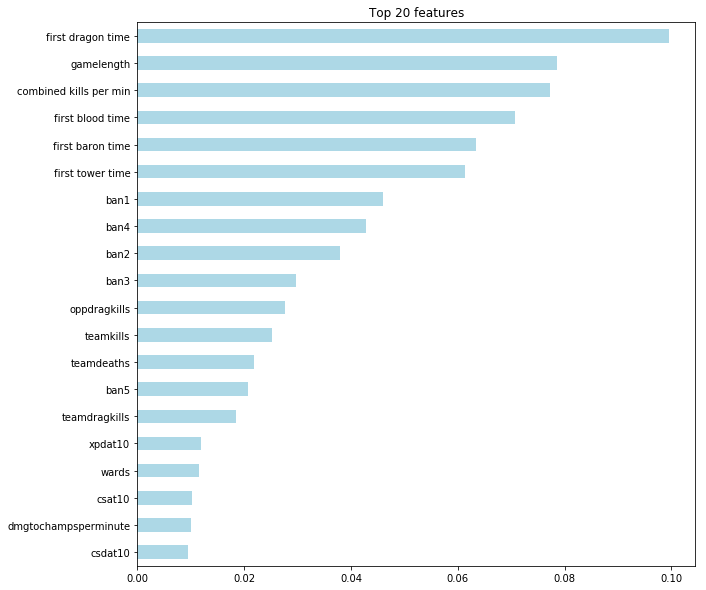

In [26]:
#Display top 20 feature 

rfc = rfc_pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rfc.feature_importances_, X_train.columns)

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='lightblue');

## Eli5 permuation

In [27]:
#import needed libraries
import eli5
from eli5.sklearn import PermutationImportance

In [28]:
#eli doesnt work with pipline(workaround)
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

eli5_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_leaf=1, random_state=42)
eli5_model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
print('Validation Accuracy', eli5_model.score(X_val_transformed, y_val))

Validation Accuracy 0.8232558139534883


In [30]:
#Find weightv importance
permuter = PermutationImportance(
    eli5_model, 
    scoring='accuracy', 
    n_iter=25, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=5,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=50,
                                                       n_

In [31]:
#Display feature weights charts
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter,
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.0551 ± 0.0224,first tower time
0.0534 ± 0.0270,combined kills per min
0.0380 ± 0.0253,first blood time
0.0372 ± 0.0195,first baron time
0.0355 ± 0.0288,first dragon time
0.0352 ± 0.0270,gamelength
0.0352 ± 0.0215,ban2
0.0238 ± 0.0140,teamdragkills
0.0160 ± 0.0235,ban4
0.0140 ± 0.0207,oppdragkills


## post permuation random forest model

In [32]:
#Grab the important features
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]

In [33]:
#Update old RFC model 

X_val = X_val[features]
X_test = X_test[features]

rfc_pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=1, random_state=42)
)

# Fit on train, score on val
rfc_pipeline.fit(X_train, y_train)
print('Validation Accuracy', rfc_pipeline.score(X_val, y_val))

Validation Accuracy 0.8651162790697674


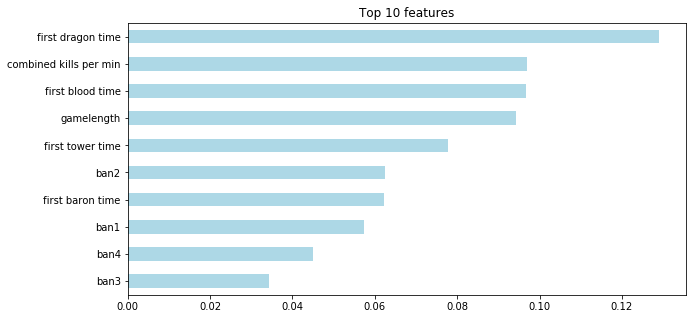

In [34]:
eli5 = rfc_pipeline.named_steps['randomforestclassifier']
importances = pd.Series(eli5.feature_importances_, X_train.columns)

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='lightblue');

# Final Model test scoring
An AUC metric is one of the better methods known for testing classification model accuracy.  

In [35]:
from sklearn.metrics import accuracy_score
#accuracy test
y_pred = rfc_pipeline.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

Test Accuracy 0.8883720930232558


In [36]:
from sklearn.metrics import roc_auc_score
#AUC test score
rfc_y_pred = rfc_pipeline.predict(X_test)
print("AUC score:,",roc_auc_score(y_test, rfc_y_pred))

AUC score:, 0.875044185224461


## Xgb model: Overfits wont be used for final model

# Visualization

## Pdp plots

In [37]:
#import needed libraries
from pdpbox.pdp import pdp_isolate, pdp_plot #isolate crunches the numbers,plot is for grpahing
from pdpbox import pdp

In [38]:
# Use Ordinal Encoder, outside of a pipeline
pdp_encoder = ce.OrdinalEncoder()
X_val_encoded_pdp = pdp_encoder.fit_transform(X_val)
# model parameters
pdp_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=1, random_state=42)
pdp_model.fit(X_val_encoded_pdp, y_val)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

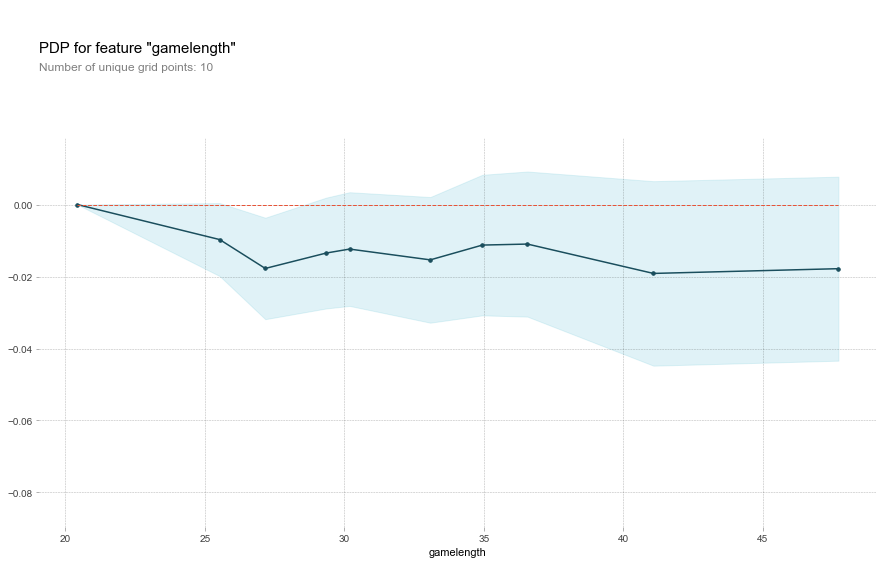

In [39]:
pdp_feature = 'gamelength'

isolated = pdp_isolate(
    model=pdp_model, 
    dataset=X_val_encoded_pdp, 
    model_features=X_val_encoded_pdp.columns, 
    feature=pdp_feature,
    num_grid_points=10
)

pdp_plot(isolated, feature_name=pdp_feature);

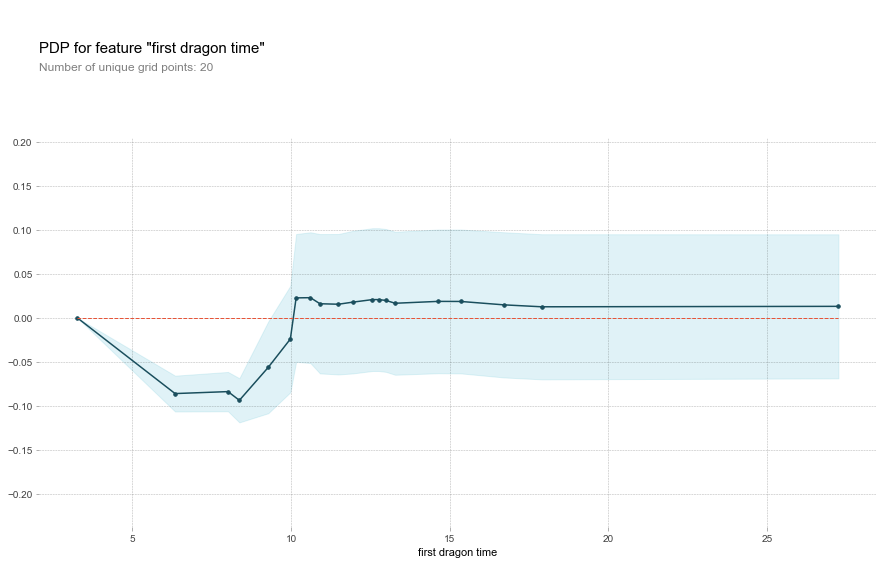

In [40]:
pdp_feature2 = "first dragon time"

isolated = pdp_isolate(
    model=rfc_pipeline, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=pdp_feature2,
    num_grid_points=20
)

pdp_plot(isolated, feature_name=pdp_feature2);

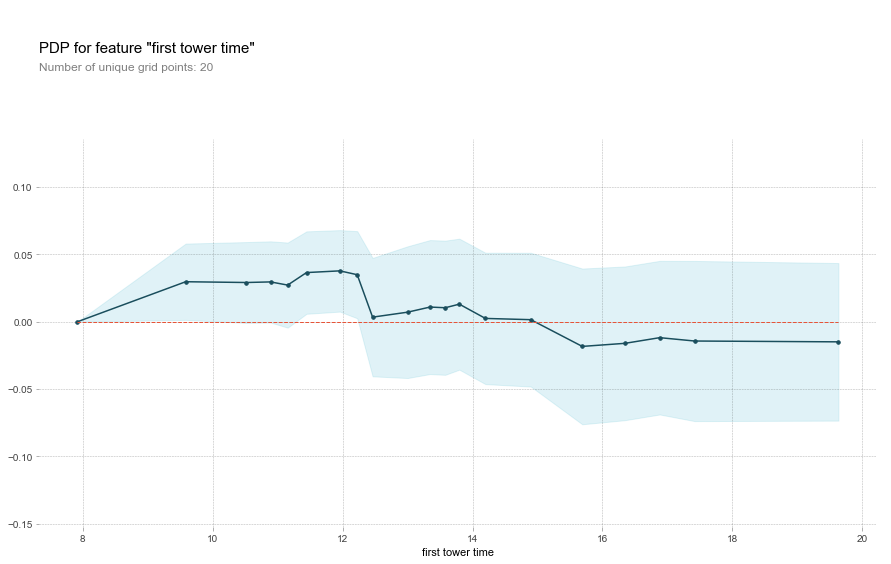

In [41]:
pdp_feature4 = "first tower time"

isolated = pdp_isolate(
    model=rfc_pipeline, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=pdp_feature4,
    num_grid_points=20
)

pdp_plot(isolated, feature_name=pdp_feature4);

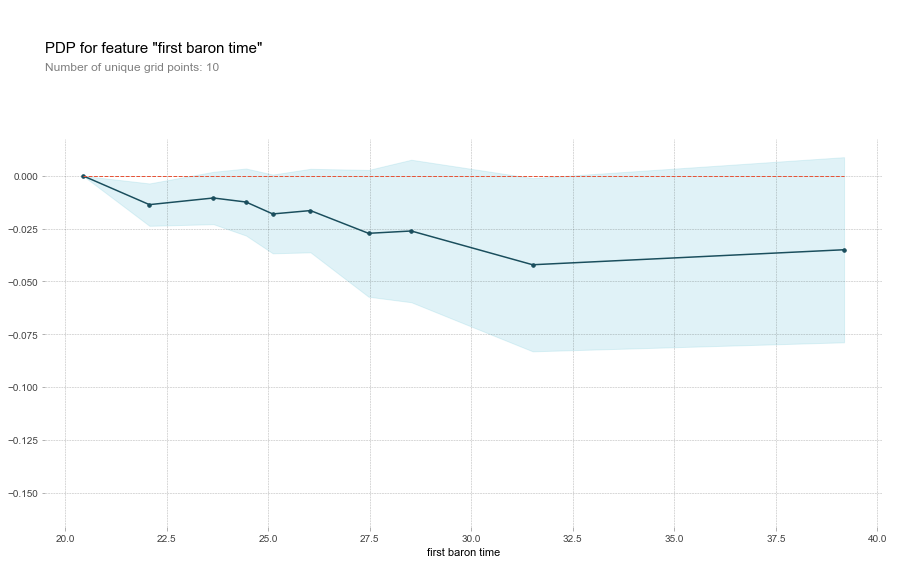

In [42]:
pdp_feature5 = "first baron time"

isolated = pdp_isolate(
    model=rfc_pipeline, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=pdp_feature5,
    #num_grid_points=10
)

pdp_plot(isolated, feature_name=pdp_feature5);

## shap visual

In [43]:
import shap

In [44]:
# Get an individual observation to explain.
row = X_val_encoded_pdp.iloc[[11]]

# What was the answer
y_val.iloc[[11]]

997    1
Name: bluevictory, dtype: int64

In [45]:
# What does the model predict for winner
rfc_pipeline.predict(row)

array([0])

In [46]:
processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=500, # <= 1000 trees, depends on early stopping
    max_depth=5,# try deeper trees because of high cardinality categoricals
    learning_rate=0.5, # try higher learning rate
    #objective="multi:softmax",
    #num_class=n+1,
    n_jobs=-1
)

#model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.923395	validation_1-auc:0.846942
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.978228	validation_1-auc:0.931115
[2]	validation_0-auc:0.993405	validation_1-auc:0.97318
[3]	validation_0-auc:0.998422	validation_1-auc:0.987716
[4]	validation_0-auc:0.999672	validation_1-auc:0.996288
[5]	validation_0-auc:0.999967	validation_1-auc:0.999558
[6]	validation_0-auc:1	validation_1-auc:1
[7]	validation_0-auc:1	validation_1-auc:1
[8]	validation_0-auc:1	validation_1-auc:1
[9]	validation_0-auc:1	validation_1-auc:1
[10]	validation_0-auc:1	validation_1-auc:1
[11]	validation_0-auc:1	validation_1-auc:1
[12]	validation_0-auc:1	validation_1-auc:1
[13]	validation_0-auc:1	validation_1-auc:1
[14]	validation_0-auc:1	validation_1-auc:1
[15]	validation_0-auc:1	validation_1-auc:1
[16]	validation_0-auc:1	validation_1-auc:1
Stopping. Best iteration:
[6]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [47]:
# Why did the model predict this?
explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

In [48]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # For classification, this shows predicted probabilities
)

In [49]:
main_df.iloc[997] # the random index row info we are using for the visual

gameid                                                            1002490539
url                        https://matchhistory.na.leagueoflegends.com/en...
league                                                                    WC
split                                                                 2018-W
date                                                                 43389.2
week                                                                       G
game                                                                       7
patchno                                                                 8.19
playerid                                                                   2
side                                                                    Blue
position                                                              Jungle
player                                                                  Haro
team                                                           Edward Gaming

# Linear regression

In [50]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy = "median"), 
    StandardScaler(), 
    LogisticRegressionCV(multi_class='auto', solver='lbfgs', cv=5, n_jobs=-1)
)

lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)

In [51]:
lr_y_pred = lr.predict(X_test)

print("AUC score:,",roc_auc_score(y_test, lr_y_pred)) # Ranges from 0-1, higher is better

AUC score:, 0.5681336161187698


In [52]:
print("Random Forest classification AUC score:,",roc_auc_score(y_test, rfc_y_pred))
print("Linear regression ROC score:,",roc_auc_score(y_test, lr_y_pred))

Random Forest classification AUC score:, 0.875044185224461
Linear regression ROC score:, 0.5681336161187698


linear regression doesnt work so well on our data set for predictions because there are to important variables that don't corrilate linearly. For instace bans 1-5. banning a certain character doesn't increase or decrease the chances of winning everytime. One ban might cancel another or boost it its jagged. Game length and baron time do have a linear correlation as time increases chances of winning decrease. so the model can predict using those feature at least. The data has to many fluctioning variables that a forest can detect a pattern on but a linear model can't make sense of it.  